<a href="https://colab.research.google.com/github/enockmario/MalariaPredictionSystem/blob/main/Malaria_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
dataset_path = "/content/drive/My Drive/Malaria_Prediction_Kilifi_Modified.csv"

In [3]:
import pandas as pd

# Load dataset, specifying the encoding
df = pd.read_csv('/content/Malaria_Prediction_Kilifi_Modified.csv', encoding='latin-1') # Try 'latin-1' or 'cp1252' if 'latin-1' doesn't work

# Display first few rows
df.head()

,Temperature (°C),Humidity (%),Rainfall (mm),Wind Speed (m/s),Altitude (m),Population Density,Health Facility Access,Previous Malaria Cases,Malaria Incidence
0,20.520000,95.020000,86.600000,2.77,105.72,997,0,881,0
1,37.298544,66.285884,361.073667,5.58,139.30,1719,1,547,1
2,20.100000,85.100000,175.460000,4.92,100.81,1984,1,309,0
3,28.006347,100.000000,494.835334,0.56,484.74,190,1,997,1
4,20.100000,85.100000,175.460000,4.92,100.81,1984,1,309,0


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 Temperature (°C)          0
Humidity (%)              0
Rainfall (mm)             0
Wind Speed (m/s)          0
Altitude (m)              0
Population Density        0
Health Facility Access    0
Previous Malaria Cases    0
Malaria Incidence         0
dtype: int64


In [5]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Remove duplicates if found
df.drop_duplicates(inplace=True)


Number of duplicate rows: 3453


In [6]:
# Display column data types
print(df.dtypes)

Temperature (°C)          float64
Humidity (%)              float64
Rainfall (mm)             float64
Wind Speed (m/s)          float64
Altitude (m)              float64
Population Density          int64
Health Facility Access      int64
Previous Malaria Cases      int64
Malaria Incidence           int64
dtype: object


In [7]:
from scipy.stats import pearsonr

# Calculate p-values for each feature
p_values = {}
for column in df.columns[:-1]:  # Exclude the target variable
    p_values[column] = pearsonr(df[column], df['Malaria Incidence'])[1]

# Display p-values
print(p_values)

{'Temperature (°C)': np.float64(3.074682191626869e-76), 'Humidity (%)': np.float64(0.011591556344480782), 'Rainfall (mm)': np.float64(0.002934012433981999), 'Wind Speed (m/s)': np.float64(0.7187858317623922), 'Altitude (m)': np.float64(0.7652237323065473), 'Population Density': np.float64(0.8496296170794285), 'Health Facility Access': np.float64(0.8862633120044688), 'Previous Malaria Cases': np.float64(0.1468986146886346)}


In [8]:
# Select features with p-values < 0.05
significant_features = [feature for feature, p_value in p_values.items() if p_value < 0.05]
df = df[significant_features + ['Malaria Incidence']]

<ipython-input-9-0d881d2ab433>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Malaria Incidence"], palette="coolwarm", edgecolor="black")


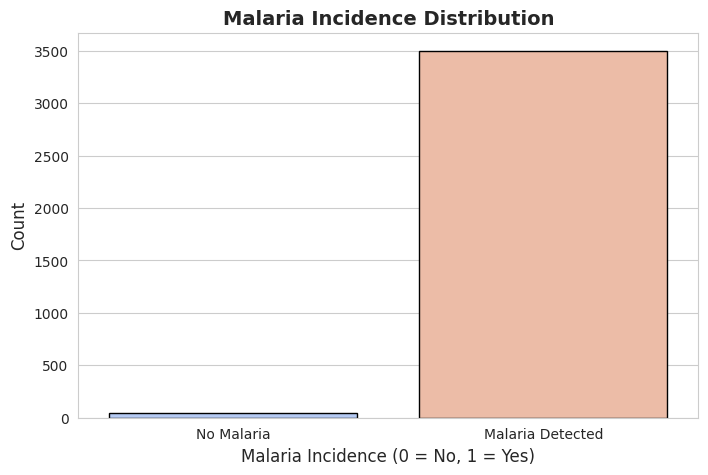

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)  # Set global figure size
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Malaria Incidence"], palette="coolwarm", edgecolor="black")

# Styling
plt.title("Malaria Incidence Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Malaria Incidence (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], ["No Malaria", "Malaria Detected"])
plt.show()


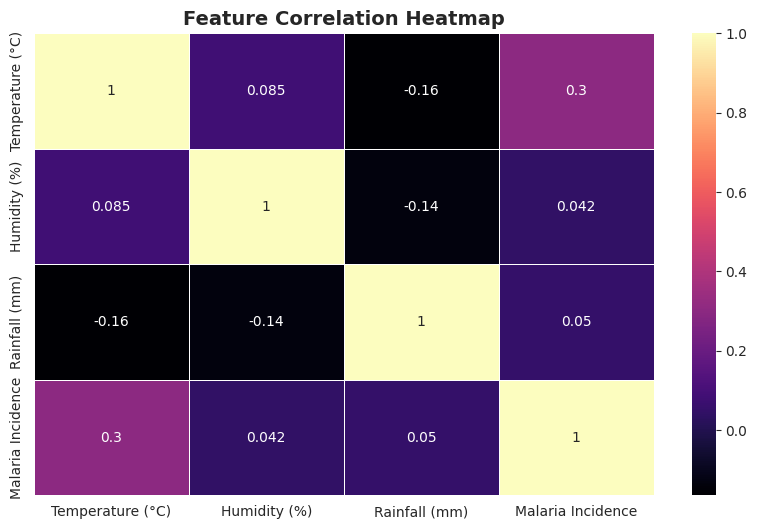

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="magma", linewidths=0.5)

# Styling
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight="bold")
plt.show()


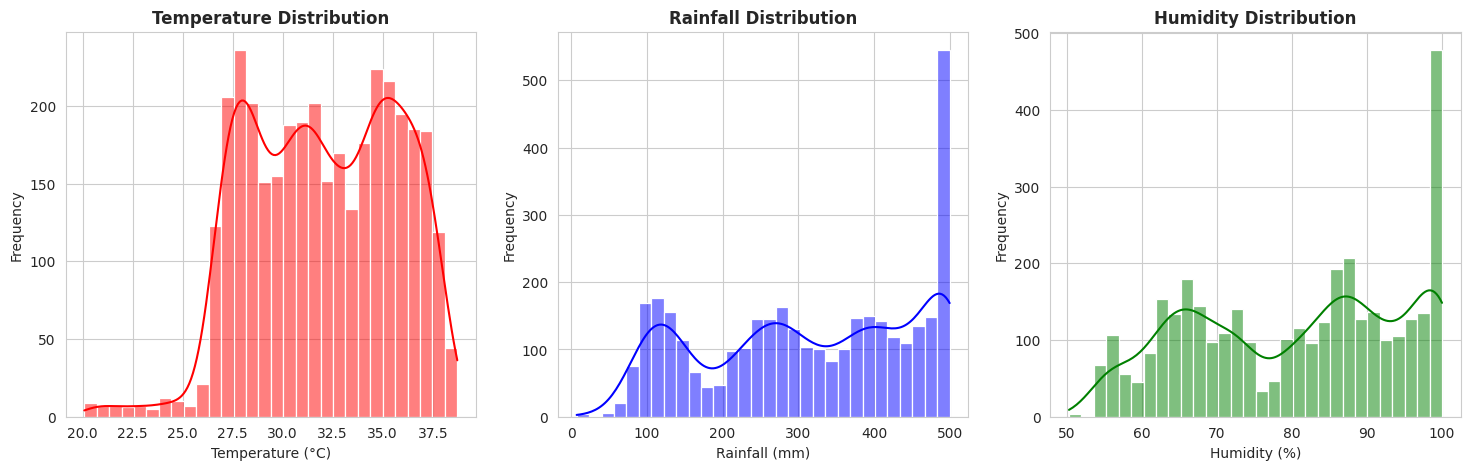

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Temperature Distribution
sns.histplot(df["Temperature (°C)"], bins=30, kde=True, color="red", ax=ax[0])
ax[0].set_title("Temperature Distribution", fontsize=12, fontweight="bold")
ax[0].set_xlabel("Temperature (°C)")
ax[0].set_ylabel("Frequency")

# Rainfall Distribution
sns.histplot(df["Rainfall (mm)"], bins=30, kde=True, color="blue", ax=ax[1])
ax[1].set_title("Rainfall Distribution", fontsize=12, fontweight="bold")
ax[1].set_xlabel("Rainfall (mm)")
ax[1].set_ylabel("Frequency")

# Humidity Distribution
sns.histplot(df["Humidity (%)"], bins=30, kde=True, color="green", ax=ax[2])
ax[2].set_title("Humidity Distribution", fontsize=12, fontweight="bold")
ax[2].set_xlabel("Humidity (%)")
ax[2].set_ylabel("Frequency")

plt.show()


<ipython-input-12-6563b9bec2ee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Malaria Incidence", y="Temperature (°C)", data=df, palette="coolwarm", ax=ax[0])
<ipython-input-12-6563b9bec2ee>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Malaria Incidence", y="Rainfall (mm)", data=df, palette="coolwarm", ax=ax[1])
<ipython-input-12-6563b9bec2ee>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Malaria Incidence", y="Humidity (%)", data=df, palette="coolwarm", ax=ax[2])


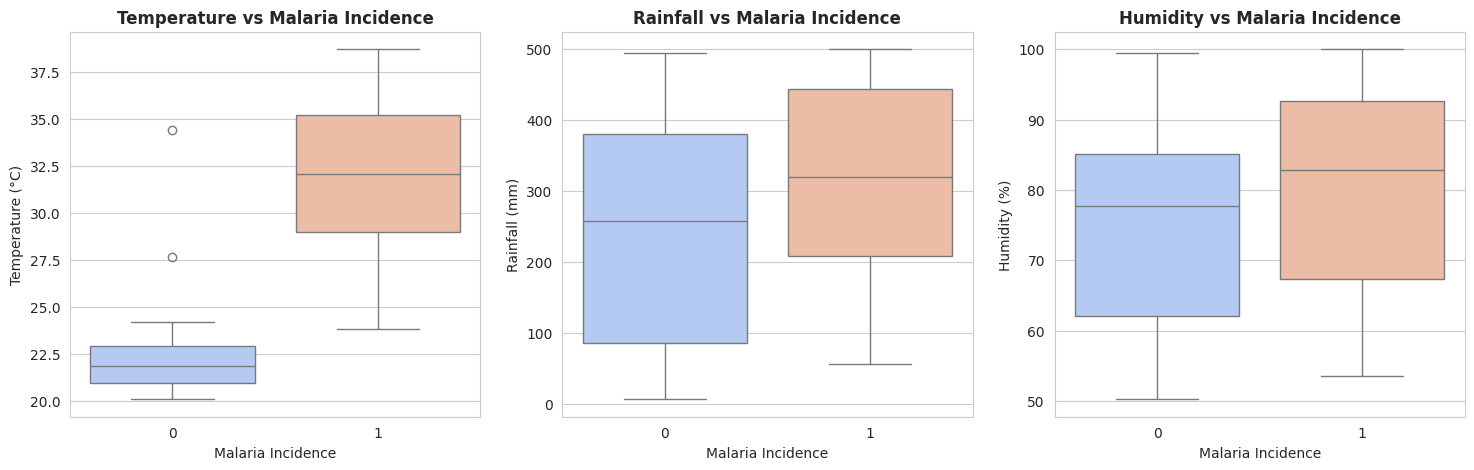

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Temperature vs Malaria Incidence
sns.boxplot(x="Malaria Incidence", y="Temperature (°C)", data=df, palette="coolwarm", ax=ax[0])
ax[0].set_title("Temperature vs Malaria Incidence", fontsize=12, fontweight="bold")
ax[0].set_xlabel("Malaria Incidence")
ax[0].set_ylabel("Temperature (°C)")

# Rainfall vs Malaria Incidence
sns.boxplot(x="Malaria Incidence", y="Rainfall (mm)", data=df, palette="coolwarm", ax=ax[1])
ax[1].set_title("Rainfall vs Malaria Incidence", fontsize=12, fontweight="bold")
ax[1].set_xlabel("Malaria Incidence")
ax[1].set_ylabel("Rainfall (mm)")

# Humidity vs Malaria Incidence
sns.boxplot(x="Malaria Incidence", y="Humidity (%)", data=df, palette="coolwarm", ax=ax[2])
ax[2].set_title("Humidity vs Malaria Incidence", fontsize=12, fontweight="bold")
ax[2].set_xlabel("Malaria Incidence")
ax[2].set_ylabel("Humidity (%)")

plt.show()


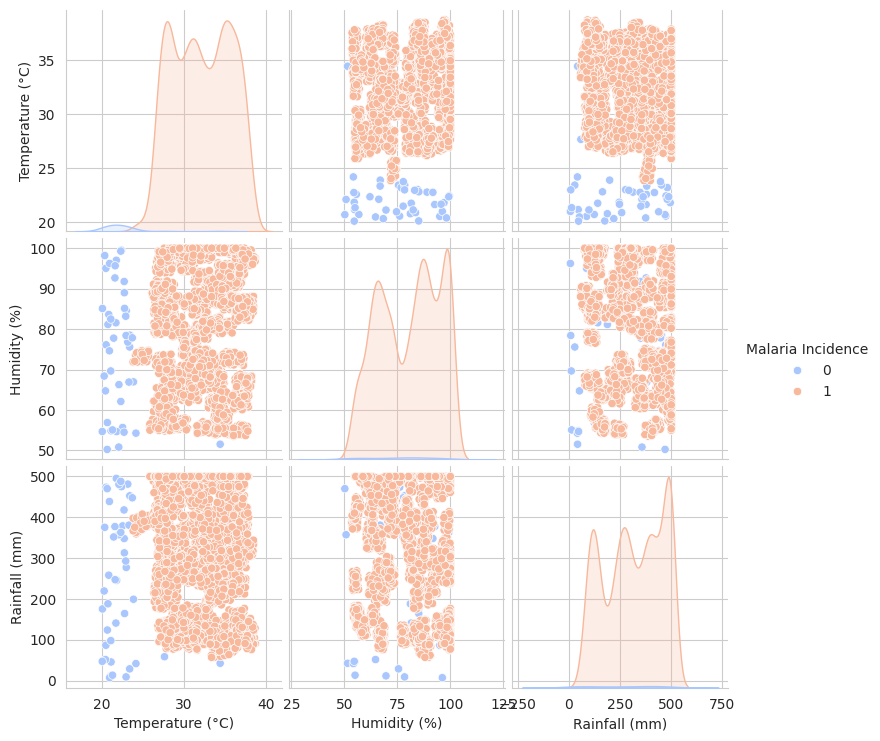

In [13]:
sns.pairplot(df, hue="Malaria Incidence", palette="coolwarm", diag_kind="kde")
plt.show()


In [14]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target) from your DataFrame 'df'
X = df.drop('Malaria Incidence', axis=1)  # Features (all columns except 'Malaria Incidence')
y = df['Malaria Incidence']  # Target variable

# Now you can split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display dataset shapes
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Validation Set: {X_val.shape}, {y_val.shape}")
print(f"Test Set: {X_test.shape}, {y_test.shape}")

Training Set: (2125, 3), (2125,)
Validation Set: (709, 3), (709,)
Test Set: (709, 3), (709,)


In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on validation set
y_pred_val_log = log_reg.predict(X_val)

# Compute accuracy
accuracy_val_log = accuracy_score(y_val, y_pred_val_log)
print("Logistic Regression - Validation Accuracy:", accuracy_val_log)

# Display classification report
print(classification_report(y_val, y_pred_val_log))


Logistic Regression - Validation Accuracy: 0.998589562764457
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       1.00      1.00      1.00       695

    accuracy                           1.00       709
   macro avg       1.00      0.96      0.98       709
weighted avg       1.00      1.00      1.00       709



In [17]:
# Predict on test set
y_pred_test_log = log_reg.predict(X_test)

# Compute accuracy
accuracy_test_log = accuracy_score(y_test, y_pred_test_log)
print("Logistic Regression - Test Accuracy:", accuracy_test_log)

# Display classification report
print(classification_report(y_test, y_pred_test_log))


Logistic Regression - Test Accuracy: 0.997179125528914
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00       706

    accuracy                           1.00       709
   macro avg       0.83      0.83      0.83       709
weighted avg       1.00      1.00      1.00       709



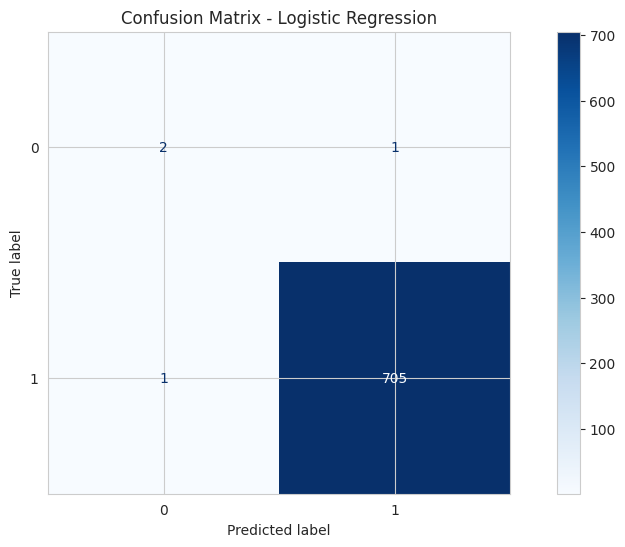

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate confusion matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_test_log)

# Display the confusion matrix
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_reg.classes_)
disp_log.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [19]:
# Increasing min_samples_leaf significantly
from sklearn.ensemble import RandomForestClassifier # Import the RandomForestClassifier class
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10,
                                  min_samples_split=10, min_samples_leaf=10,
                                  random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=50, random_state=42)

In [20]:
# Reducing max_features
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10,
                                  min_samples_split=10, min_samples_leaf=10,
                                  max_features='sqrt', random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=50, random_state=42)

In [21]:
# Reducing n_estimators further
rf_model = RandomForestClassifier(n_estimators=10, max_depth=10,
                                  min_samples_split=10, min_samples_leaf=10,
                                  max_features='sqrt', random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=10, random_state=42)

In [22]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10,
                                  min_samples_split=10, min_samples_leaf=10,
                                  max_features='sqrt', oob_score=True, random_state=42)
rf_model.fit(X_train, y_train)

print("OOB Score:", rf_model.oob_score_)


OOB Score: 0.9981176470588236


In [23]:
# Predict on validation set
y_pred_val_rf = rf_model.predict(X_val)

# Compute accuracy
accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
print("Random Forest - Validation Accuracy:", accuracy_val_rf)

# Display classification report
print(classification_report(y_val, y_pred_val_rf))


Random Forest - Validation Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00       695

    accuracy                           1.00       709
   macro avg       1.00      1.00      1.00       709
weighted avg       1.00      1.00      1.00       709



In [24]:
# Predict on test set
y_pred_test_rf = rf_model.predict(X_test)

# Compute accuracy
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
print("Random Forest - Test Accuracy:", accuracy_test_rf)

# Display classification report
print(classification_report(y_test, y_pred_test_rf))


Random Forest - Test Accuracy: 0.995768688293371
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       1.00      1.00      1.00       706

    accuracy                           1.00       709
   macro avg       0.75      0.83      0.78       709
weighted avg       1.00      1.00      1.00       709



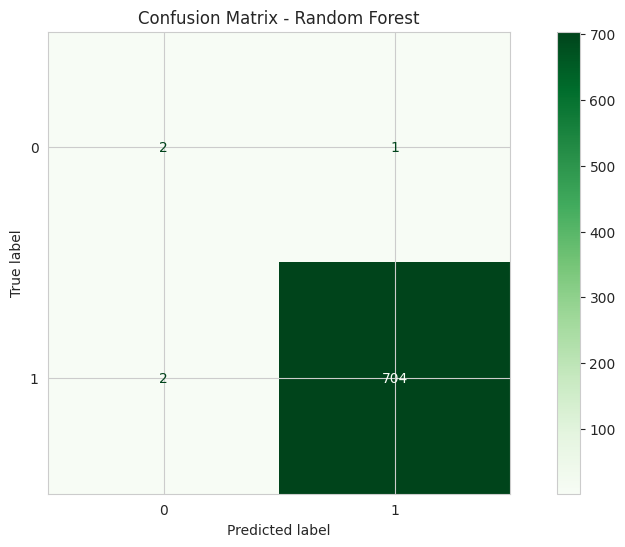

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay# Generate confusion matrix for Random Forest
# Generate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_test_rf)

# Display the confusion matrix
# Use rf_model.classes_ instead of rf.classes_
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [26]:
train_acc_log = accuracy_score(y_train, log_reg.predict(X_train))
val_acc_log = accuracy_score(y_val, y_pred_val_log)
test_acc_log = accuracy_score(y_test, y_pred_test_log)

train_acc_rf = accuracy_score(y_train, rf_model.predict(X_train))
val_acc_rf = accuracy_score(y_val, y_pred_val_rf)
test_acc_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Logistic Regression - Training Accuracy: {train_acc_log:.4f}")
print(f"Logistic Regression - Validation Accuracy: {val_acc_log:.4f}")
print(f"Logistic Regression - Test Accuracy: {test_acc_log:.4f}\n")

print(f"Random Forest - Training Accuracy: {train_acc_rf:.4f}")
print(f"Random Forest - Validation Accuracy: {val_acc_rf:.4f}")
print(f"Random Forest - Test Accuracy: {test_acc_rf:.4f}")


Logistic Regression - Training Accuracy: 0.9986
Logistic Regression - Validation Accuracy: 0.9986
Logistic Regression - Test Accuracy: 0.9972

Random Forest - Training Accuracy: 0.9986
Random Forest - Validation Accuracy: 1.0000
Random Forest - Test Accuracy: 0.9958


In [27]:
if test_acc_rf > test_acc_log:
    print("🎯 Random Forest performs better!")
else:
    print("🎯 Logistic Regression performs better!")

🎯 Logistic Regression performs better!


In [28]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(log_reg, 'logistic_regression_model.pkl')

print("✅ Model saved successfully!")


✅ Model saved successfully!
